In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [390]:
df=pd.read_csv('bank-additional-full.csv',sep=",")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [113]:
print('Shape of data:',df.shape)

Shape of data: (41188, 21)


## Visualization

### Distribution of class variable

In [145]:
df['y'].value_counts(normalize=True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

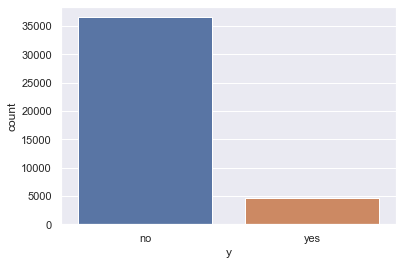

In [92]:
sns.countplot(df['y']);

#### The dataset is imbalanced, i.e the numbers of class 'no' is close to 8 times the class 'yes'

### Univariate analysis of Categorical variables:

In [82]:
#Function to plot all variables with y to find the class distribution of each variable

def countplot_withY(label, data):
  plt.figure(figsize=(20,10))
  ax=sns.countplot(x=label, data=data, hue="y")
plt.show()

#### Job

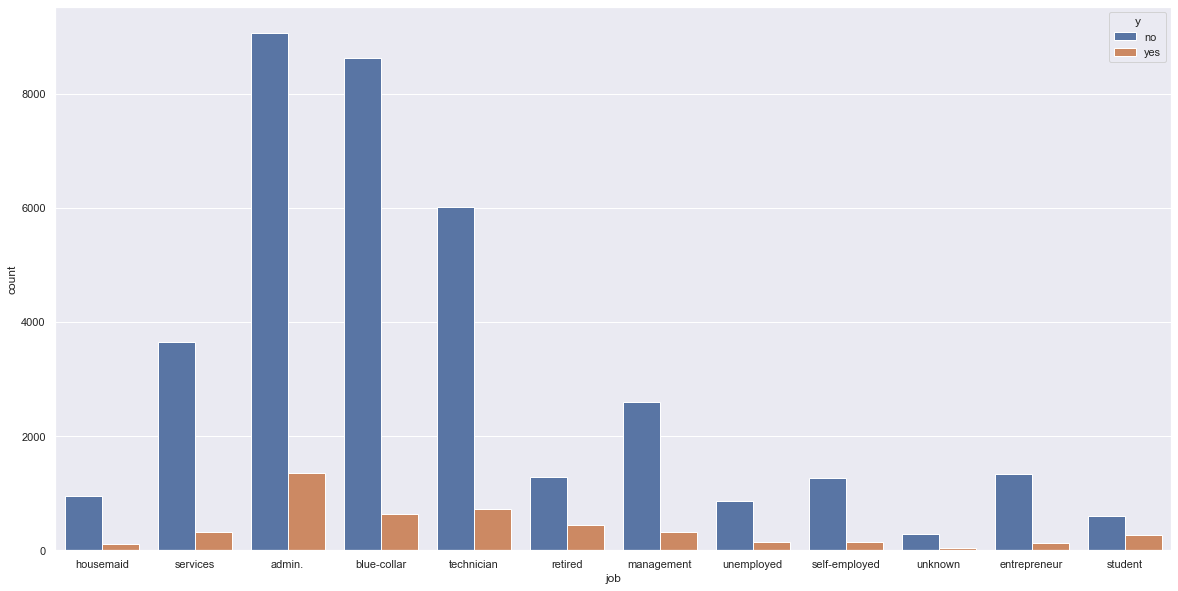

In [93]:
countplot_withY(df['job'], df)

#### Marital

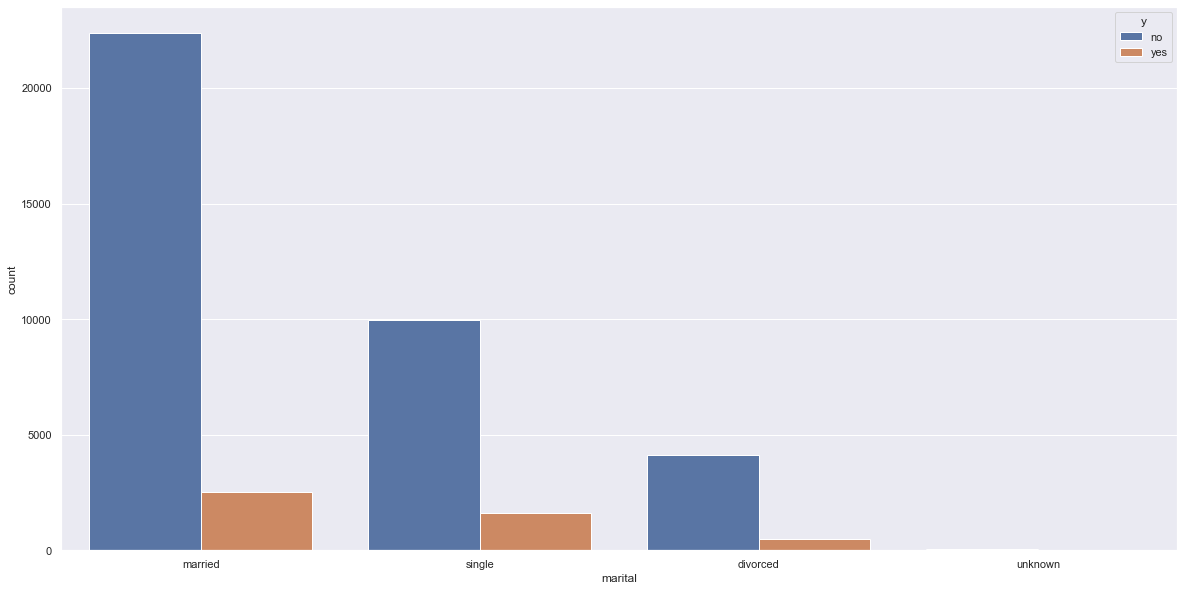

In [94]:
countplot_withY(df['marital'], df)

#### Default

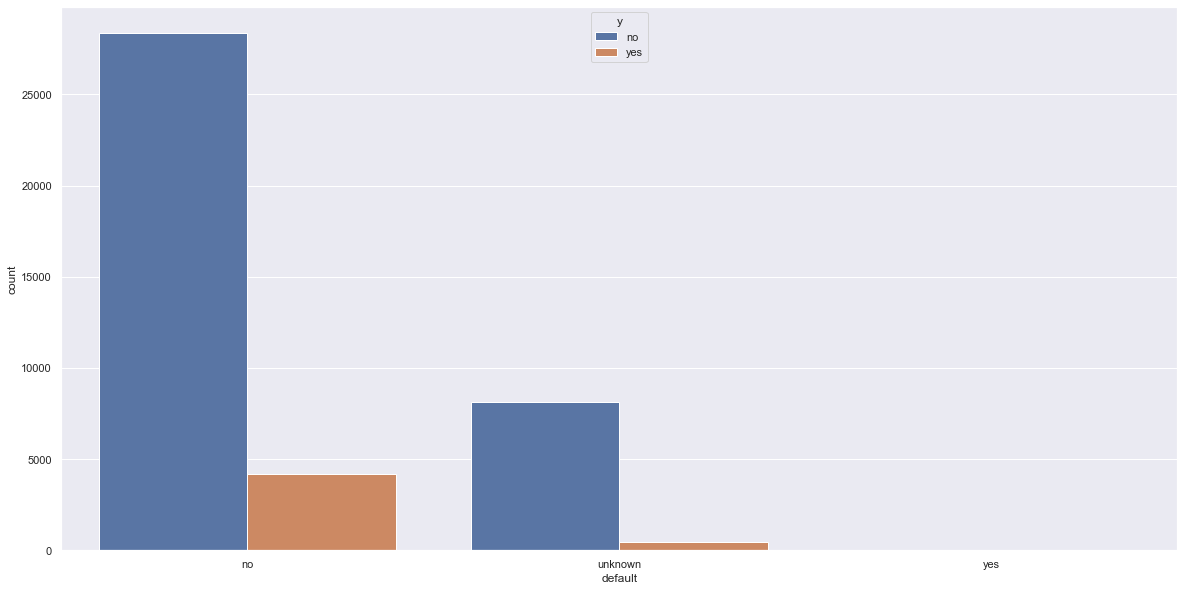

In [95]:
countplot_withY(df['default'], df)

#### Housing

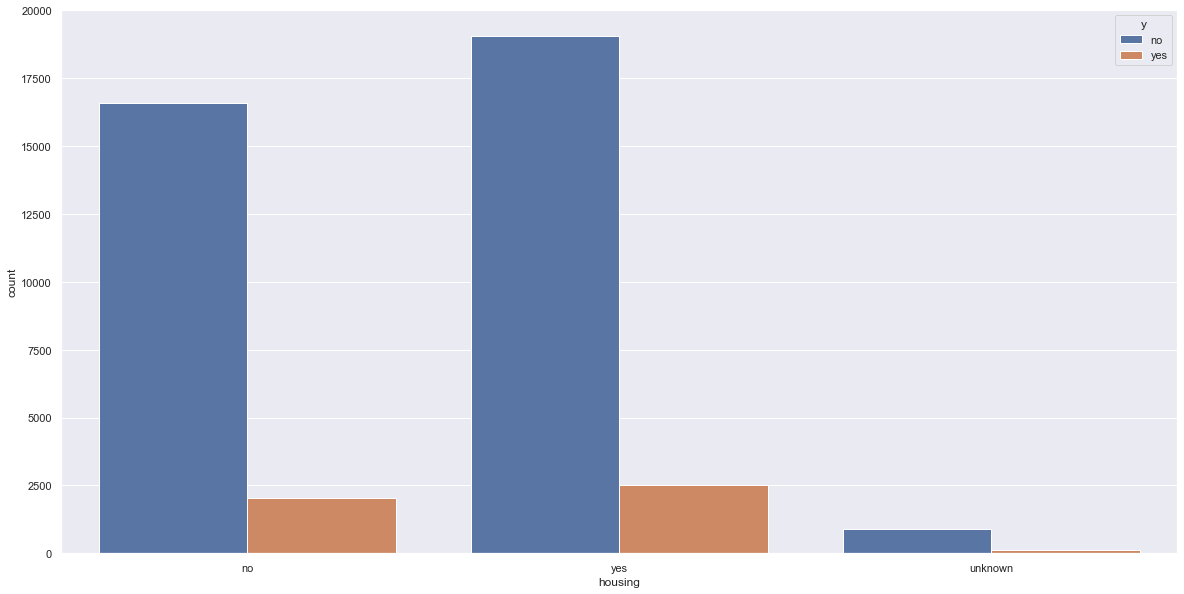

In [96]:
countplot_withY(df['housing'], df)

#### poutcome

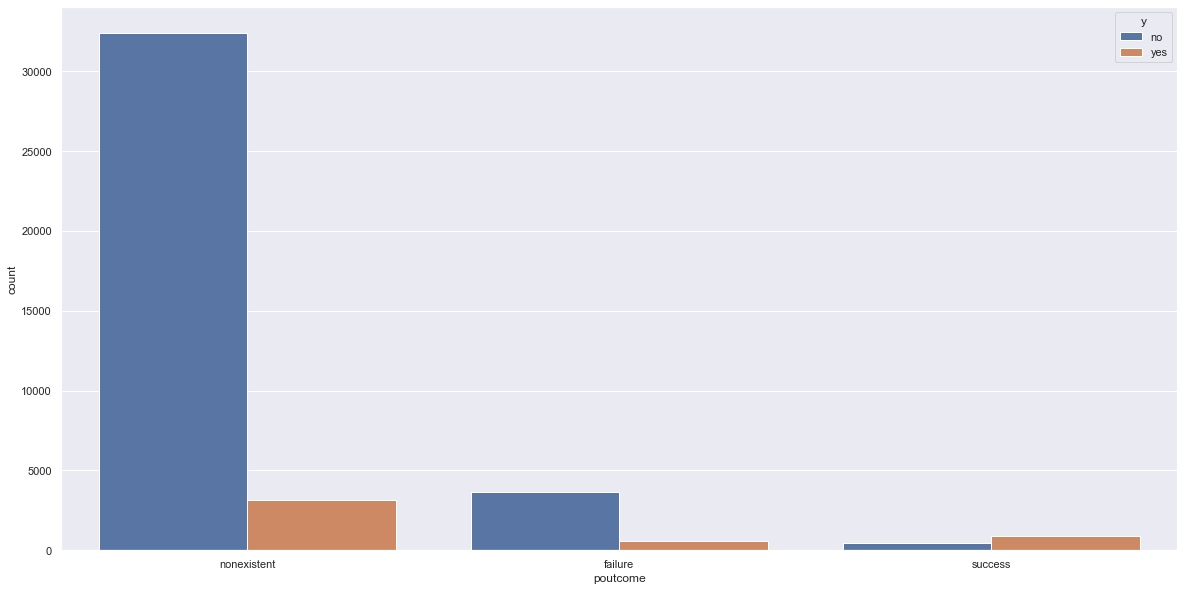

In [97]:
countplot_withY(df['poutcome'], df)

#### day of week

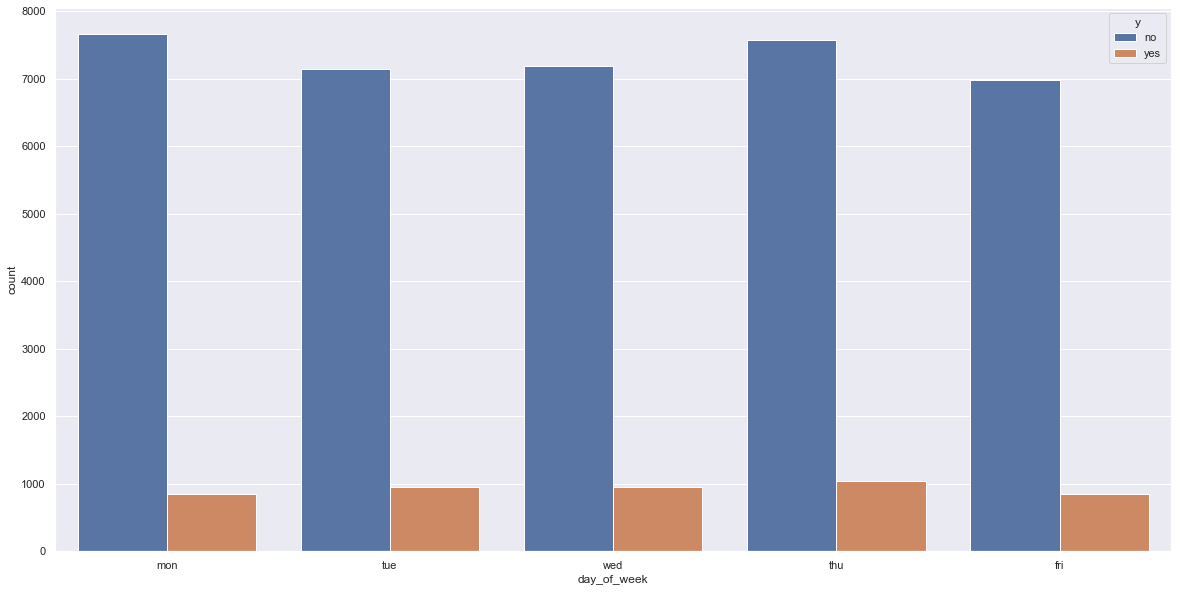

In [98]:
countplot_withY(df['day_of_week'], df)

### Univariate analysis on Numerical features:

#### Age

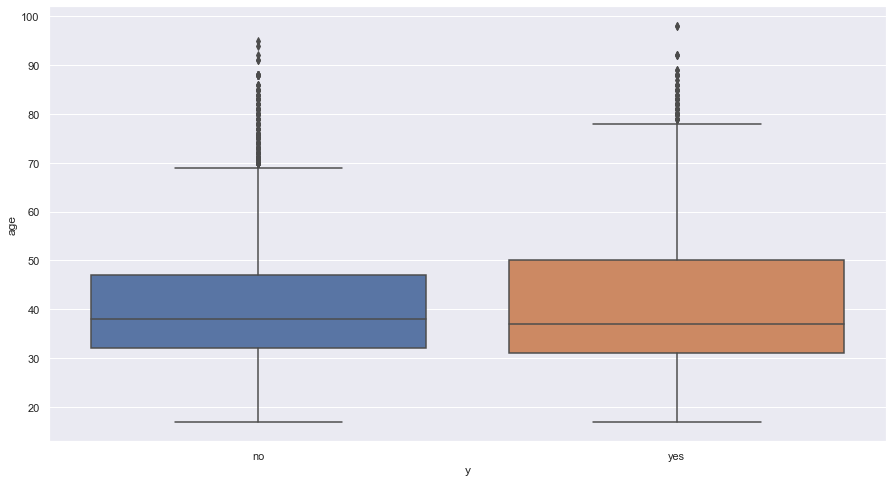

In [101]:
plt.figure(figsize=[15,8]);
sns.boxplot(x='y',y='age',data=df);

#### emp.var.rate

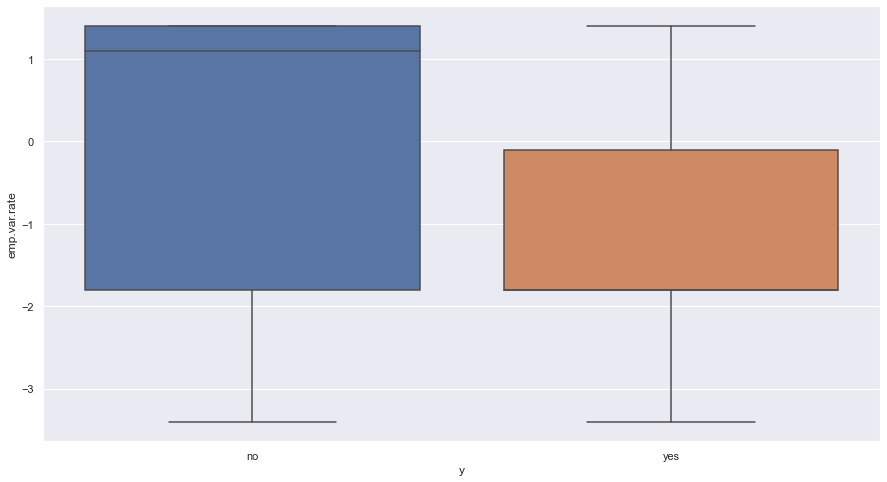

In [102]:
plt.figure(figsize=[15,8]);
sns.boxplot(x='y',y='emp.var.rate',data=df);

#### euribor3m

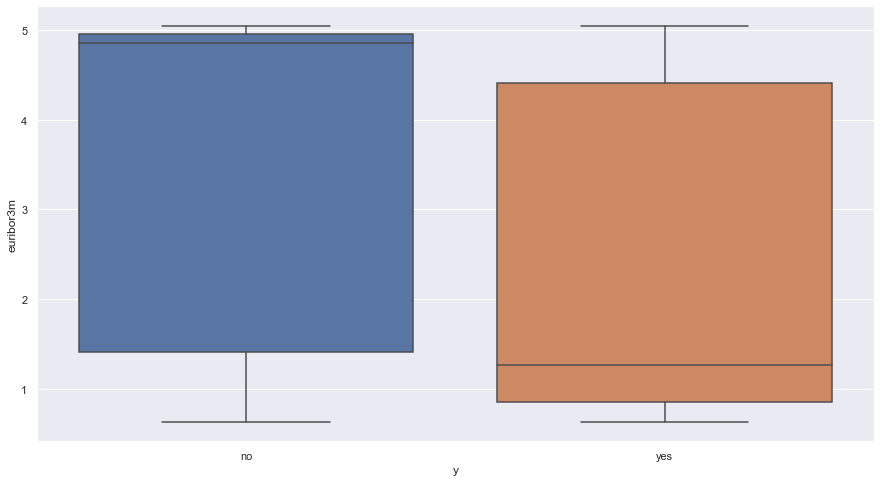

In [103]:
plt.figure(figsize=[15,8]);
sns.boxplot(x='y',y='euribor3m',data=df);


#### cons.conf.idx

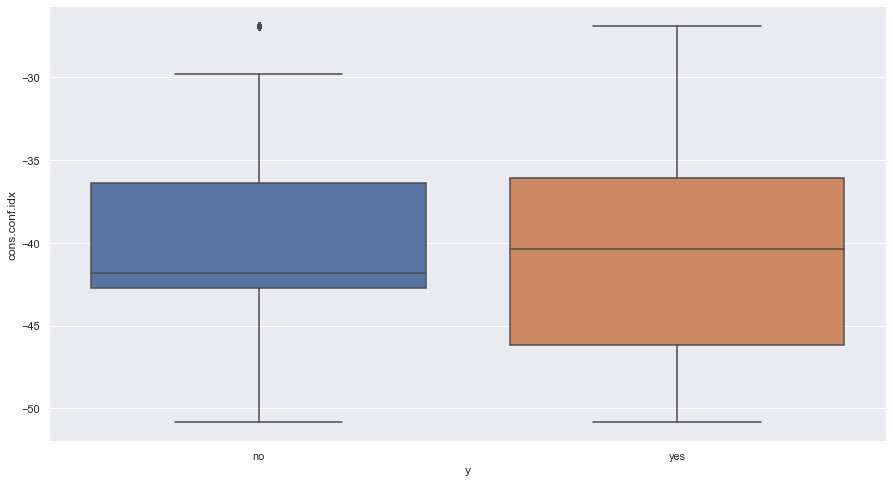

In [119]:
plt.figure(figsize=[15,8]);
sns.boxplot(x='y',y='cons.conf.idx',data=df);

### Correlation Matrix of the numerical features:

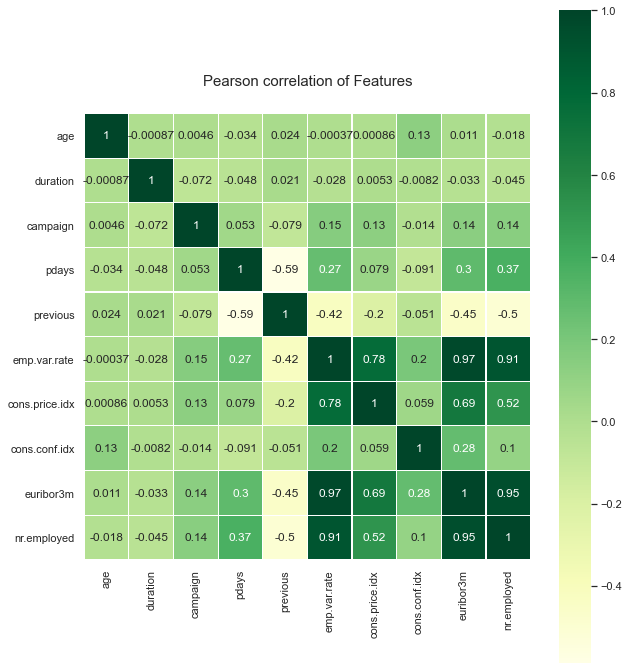

In [293]:
corr = df.drop('y',axis=1).corr()

f, ax = plt.subplots(figsize=(10,12))

sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1);

plt.title("Pearson correlation of Features", y=1.05, size=15);

In [29]:
df[df.duplicated(keep='last')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [391]:
df=df.drop_duplicates()
print('Shape of dataframe after removing duplicates:',df.shape)

Shape of dataframe after removing duplicates: (41176, 21)


### Statistics

### Hypothesis Statements and parametric tests:

In [221]:
from statsmodels.stats import weightstats as stests
from scipy import stats
a=df[df['y']=='yes']['age']
b=df[df['y']=='no']['age']


stat, p_value = stats.shapiro(df_bank['age'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal

test = stats.mannwhitneyu(a,b)
print('Test Statistic:',test[0])
print('p_value:',test[1])
#Since p value is less than 0.05, we fail to accept null hypothesis and conclude age makes a difference in subscription

z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)

Test statistic: 0.9572598338127136
P-Value: 0.0
Test Statistic: 82905027.5
p_value: 0.00781888870286014
Z-score:  6.167476160870456
p-value:  6.9388569761669e-10


Does having a job influence the decision of subscribing to a bank term deposit ?

In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
df['job'].nunique()

11

The null and alternative hypothesis is:

H0: The variables y and job are independent
H1: The variables y and job are dependent

In [28]:
table = pd.crosstab(df['y'], df['job'])

# observed values  
observed_value = table.values
observed_value

array([[8774, 8493, 1278,  913, 2490, 1193, 1215, 3521,  571, 5804,  825],
       [1167,  509,   99,   92,  271,  363,  120,  264,  240,  607,  124]],
      dtype=int64)

In [29]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 10), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude job and subscription are dependent

Critical value for chi-square test: 18.307
Test statistic: 948.0008300578947
p-value: 2.956729736630916e-197


Does having an existing loan affect the decision of subscribing to a bank term deposit ?

The null and alternative hypothesis is:

H0: The variables y and loan are independent
H1: The variables y and loan are dependent

In [30]:
table = pd.crosstab(df['loan'], df['y'])

# observed values  
observed_value = table.values
observed_value

array([[29609,  3276],
       [ 5468,   580]], dtype=int64)

In [31]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to reject null hypothesis and conclude loan status and subscription are independent

Critical value for chi-square test: 3.8415
Test statistic: 0.7924122384962939
p-value: 0.3733717128403643


Is marital status affecting the customer subscription ?

The null and alternative hypothesis is:

H0: The variables y and marital status are independent
H1: The variables y and marital status are dependent

In [32]:
table = pd.crosstab(df['marital'], df['y'])

# observed values  
observed_value = table.values
observed_value

array([[ 3964,   409],
       [21583,  2073],
       [ 9530,  1374]], dtype=int64)

In [33]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude marital status and subscription are dependent

Critical value for chi-square test: 5.9915
Test statistic: 124.87204495143374
p-value: 7.6626672500946715e-28


is customer subscription dependent or independent on housing?
is ycustomer subscription dependent or independent on education?

The null and alternative hypothesis is:

H0: The variables y and marital status are independent
H1: The variables y and marital status are dependent

In [34]:
table1 = pd.crosstab(df2['education'], df2['y'])

# observed values  
observed_value1 = table1.values
print(observed_value1)
print('')
table2 = pd.crosstab(df2['housing'], df2['y'])

# observed values  
observed_value2 = table2.values
print(observed_value2)

[[ 3567   347]
 [ 2020   136]
 [ 5885   401]
 [ 8163   856]
 [   13     4]
 [ 4637   524]
 [10792  1588]]

[[16327  1701]
 [18750  2155]]


In [35]:
chi2_val_education = np.abs(round(stats.chi2.isf(q = 0.05, df = 6), 4))

print('Critical value for chi-square test:', chi2_val_education)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value1, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude education and subscription are dependent

chi2_val_housing = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val_housing)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value2, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude housing and subscription are dependent

Critical value for chi-square test: 12.5916
Test statistic: 247.6611267976863
p-value: 1.2963114586116053e-50
Critical value for chi-square test: 3.8415
Test statistic: 8.271785987140502
p-value: 0.004026587760053207


Are date and time conditions relevant to the subscription ?

In [36]:
table1 = pd.crosstab(df['month'], df['y'])

# observed values  
observed_value1 = table1.values
print(observed_value1)
print('')
table2 = pd.crosstab(df['day_of_week'], df['y'])

# observed values  
observed_value2 = table2.values
print(observed_value2)

[[ 2029   483]
 [ 5373   564]
 [   87    83]
 [ 6315   524]
 [ 4558   481]
 [  263   267]
 [12442   723]
 [ 3578   365]
 [  129   128]
 [  303   238]]

[[6671  697]
 [7399  722]
 [7281  852]
 [6839  782]
 [6887  803]]


In [37]:
chi2_val_month = np.abs(round(stats.chi2.isf(q = 0.05, df = 9), 4))

print('Critical value for chi-square test:', chi2_val_month)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value1, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude month and subscription are dependent

chi2_val_dayofweek = np.abs(round(stats.chi2.isf(q = 0.05, df = 4), 4))

print('Critical value for chi-square test:', chi2_val_dayofweek)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value2, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude day of week and subscription are dependent

Critical value for chi-square test: 16.919
Test statistic: 2998.717093849492
p-value: 0.0
Critical value for chi-square test: 9.4877
Test statistic: 17.542049303407616
p-value: 0.0015161162482487099


duration has any effect on term deposit?(More duration more likely to subscribe?)

In [38]:
print('mean duration of people subscribed:',a.mean(),'and mean duration of people not subscribed:',b.mean())

mean duration of people subscribed: 40.879408713692946 and mean duration of people not subscribed: 39.874675713430456


The null and alternative hypothesis is:
𝜇1:mean duration of people subscribed, 𝜇2:mean duration of people not subscribed
H0:  𝜇1−𝜇2≤0 
H1:  𝜇1−𝜇2>0

In [39]:
a=df[df['y']=='yes']['duration']
b=df[df['y']=='no']['duration']
stats.shapiro(df['duration'])
#Data is not normal

ShapiroResult(statistic=0.8479138016700745, pvalue=0.0)

In [40]:
stats.levene(a,b)

LeveneResult(statistic=1743.7597006978829, pvalue=0.0)

In [41]:
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=25928115.5, pvalue=0.0)

In [42]:
z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'larger')
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  81.08376990592814
p-value:  0.0


Since p value is less than 0.05 we fail to accept the null hypothesis and conclude based on the evidence that mean duration of people subscribed is more

pdays has any effect on term deposit?

𝜇1:mean duration of pdays for people subscribed, 𝜇2:mean duration of pdays for people not subscribed

H0:  𝜇1−𝜇2=0 
H1:  𝜇1−𝜇2≠0

In [43]:
a=df[df['y']=='yes']['pdays']
b=df[df['y']=='no']['pdays']
stats.shapiro(df2['pdays'])
#Data is not normal

ShapiroResult(statistic=0.17865514755249023, pvalue=0.0)

In [44]:
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=53231664.5, pvalue=0.0)

In [45]:
z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -72.20937511226659
p-value:  0.0


Since p value is less than 0.05 we fail to accept the null hypothesis and conclude based on the evidence that pdays has some effect on subscription

nr.employed has any effect on term deposit?

In [46]:
table_nremployed = pd.crosstab(df['nr.employed'], df['y'])
# observed values  
observed_value_nremployed = table_nremployed.values
print(observed_value_nremployed)


chi2_val_month = np.abs(round(stats.chi2.isf(q = 0.05, df = 10), 4))

print('Critical value for chi-square test:', chi2_val_month)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value_nremployed, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude nr.employed and subscription are dependent

[[  324   278]
 [  361   381]
 [  275   352]
 [  338   262]
 [   78    82]
 [ 1021   568]
 [ 7222   958]
 [    9     1]
 [ 7237   163]
 [ 3348   191]
 [14864   620]]
Critical value for chi-square test: 18.307
Test statistic: 7286.680811972471
p-value: 0.0


contact method has any effect on term deposit?

In [47]:
degree=df['contact'].nunique()-1

In [48]:
table_contactmethod = pd.crosstab(df['contact'], df['y'])

# observed values  
observed_value_contactmethod = table_contactmethod.values
print(observed_value_contactmethod)


chi2_val_month = np.abs(round(stats.chi2.isf(q = 0.05, df = degree), 4))

print('Critical value for chi-square test:', chi2_val_month)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value_contactmethod, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude contact method and subscription are dependent

[[21400  3257]
 [13677   599]]
Critical value for chi-square test: 3.8415
Test statistic: 823.1524859147999
p-value: 4.993243086376616e-181


poutcome has any effect on subscription?

In [49]:
table_poutcome = pd.crosstab(df['poutcome'], df['y'])

# observed values  
observed_value_poutcome = table_poutcome.values
print(observed_value_poutcome)


chi2_val_month = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val_month)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value_poutcome, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude previous contact result and subscription are dependent

[[ 3474   503]
 [31161  2542]
 [  442   811]]
Critical value for chi-square test: 5.9915
Test statistic: 4464.240900946657
p-value: 0.0


does euribor3m affect customer subscription?

𝜇1:mean euribor3m for people subscribed , 𝜇2:mean euribor3m for people not subscribed

H0:  𝜇1−𝜇2=0 
H1:  𝜇1−𝜇2≠0

In [50]:
a=df[df['y']=='yes']['euribor3m']
b=df[df['y']=='no']['euribor3m']
stats.shapiro(df2['euribor3m'])
#Data is not normal

ShapiroResult(statistic=0.6830474138259888, pvalue=0.0)

In [51]:
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=31355108.5, pvalue=0.0)

In [52]:
z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -66.61466032021876
p-value:  0.0


Since p value is less than 0.05 we fail to accept the null hypothesis and conclude based on the evidence that euribor3m has some effect on subscription

### Data Preprocessing

#### Note : Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, twe are discarding duration to have a realistic predictive model

In [392]:
df.drop('duration',axis=1,inplace=True)

In [6]:
df.skew()

age               0.784560
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

In [393]:
df_feat=df.drop('y',axis=1)

#### Numerical Columns

In [394]:
num_cols_df=df_feat.select_dtypes(include=np.number)

In [395]:

num_cols=num_cols_df.columns

In [335]:
df_feat[num_cols].isnull().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

#### Categorical Columns

In [396]:
cat_cols_df=df_feat.select_dtypes(include=object)

In [397]:
cat_cols=cat_cols_df.columns

In [322]:
df_feat[cat_cols].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [398]:
cat_cols_en=pd.get_dummies(df_feat[cat_cols],drop_first=True)
cat_cols_en.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [16]:
cat_cols_all=list(cat_cols_en.columns)

#### Concatenating the numerical and encoded variables to create final dataframe

In [399]:
df_bank=pd.concat([num_cols_df,cat_cols_en],axis=1)
df_bank.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


### Splitting the data:

In [400]:
df['y'].replace({'yes':1,'no':0},inplace=True)

In [418]:
ss=StandardScaler()
X=df_bank
y=df['y']
#scaled_X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
X_train_sc=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)

In [97]:
from sklearn.model_selection import cross_val_score,KFold,LeaveOneOut
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,roc_auc_score,roc_curve,plot_confusion_matrix,plot_roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split


In [343]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [420]:
#Using KFold validation
kf=KFold(5)
accu=[]
for name, model in models:
    score=[]
    results_c = []
    for train_index,test_index in kf.split(X_train_sc): #get indices for train and test
        xtrain_k,xtest_k,ytrain_k,ytest_k=X_train_sc.iloc[train_index],X_train_sc.iloc[test_index],\
                                          y_train.iloc[train_index],y_train.iloc[test_index]
        mod=model.fit(xtrain_k,ytrain_k)#fit the model
        ypred=mod.predict(xtest_k)#predict output
        score.append(accuracy_score(ytest_k,ypred))
    print(name,score)#add accuracy score for 5 folds for a particular model
    results_c.append(np.mean(score))#calculate mean of all 5 folds for that particular model
    print('Average accuracy score of',name,'is',results_c)
    accu.append(results_c)

LR [0.8962705984388551, 0.8928013876843018, 0.8978317432784042, 0.8979875086745316, 0.9018043025676613]
Average accuracy score of LR is [0.8973391081287507]
KNN [0.8900260190806591, 0.8856895056374675, 0.8882914137033825, 0.8854961832061069, 0.8908743927827897]
Average accuracy score of KNN is [0.8880755028820811]
CART [0.8322636600173461, 0.8426712922810061, 0.8404163052905465, 0.8362248438584317, 0.8343164469118668]
Average accuracy score of CART is [0.8371785096718394]
NB [0.7441457068516912, 0.7300954032957502, 0.7328707718993929, 0.7179042331714087, 0.7229354614850798]
Average accuracy score of NB is [0.7295903153406647]
RF [0.8891587163920208, 0.8908933217692975, 0.8926279271465741, 0.8929562803608605, 0.8917418459403192]
Average accuracy score of RF is [0.8914756183218145]
[09:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chan

In [421]:
table=pd.DataFrame(accu,index=['KNN','LR','CART','NB','RF','XGB','GB'])
table.sort_values(by=0,ascending=False)

,0
GB,0.897998
KNN,0.897339
XGB,0.894216
RF,0.891476
LR,0.888076
CART,0.837179
NB,0.729590


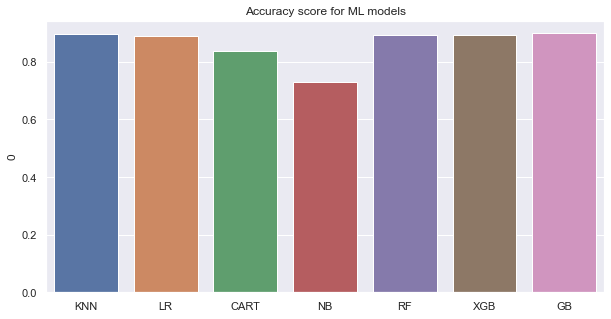

In [404]:
plt.figure(figsize=(10,5))
sns.barplot(data=table,x=table.index,y=table[0])
plt.title('Accuracy score for ML models')
plt.show()

We can see that GB,KNN and XGB models give us the best Accuracy

### XGB Model

In [432]:
xgb=XGBClassifier()
xgb_model=xgb.fit(X_train_sc,y_train)
ypred_xg=xgb_model.predict(X_test_sc)

[09:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [433]:
print(classification_report(y_test,ypred_xg))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11025
           1       0.57      0.31      0.40      1328

    accuracy                           0.90     12353
   macro avg       0.74      0.64      0.67     12353
weighted avg       0.88      0.90      0.89     12353



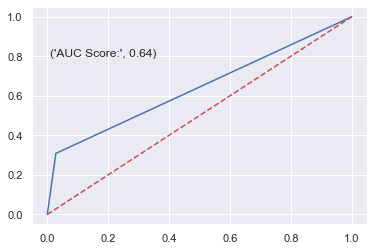

In [434]:
fpr,tpr,th=roc_curve(y_test,ypred_xg);

plt.plot(fpr,tpr);
plt.plot([0,1],[0,1],'r--');
plt.text(x=0.01,y=0.8,s=('AUC Score:',round(roc_auc_score(y_test,ypred_xg),2)));

### RF Model

In [435]:
rf=RandomForestClassifier()
rf_model=rf.fit(X_train_sc,y_train)
ypred_rf=rf_model.predict(X_test_sc)

In [436]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11025
           1       0.55      0.30      0.39      1328

    accuracy                           0.90     12353
   macro avg       0.74      0.64      0.67     12353
weighted avg       0.88      0.90      0.89     12353



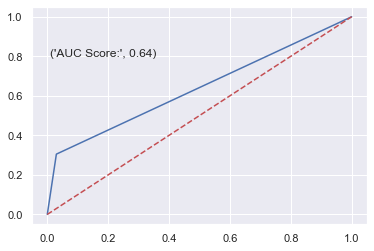

In [437]:
fpr,tpr,th=roc_curve(y_test,ypred_rf);

plt.plot(fpr,tpr);
plt.plot([0,1],[0,1],'r--');
plt.text(x=0.01,y=0.8,s=('AUC Score:',round(roc_auc_score(y_test,ypred_rf),2)));

### GB Model

In [439]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(X_train_sc,y_train)
ypred_gb=gb_model.predict(X_test_sc)

In [440]:
print(classification_report(y_test,ypred_gb))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11025
           1       0.64      0.28      0.39      1328

    accuracy                           0.91     12353
   macro avg       0.78      0.63      0.67     12353
weighted avg       0.89      0.91      0.89     12353



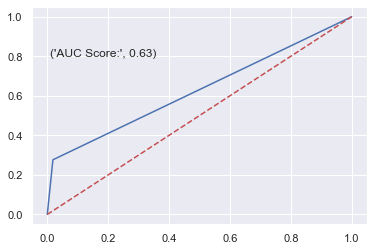

In [441]:
fpr,tpr,th=roc_curve(y_test,ypred_gb);

plt.plot(fpr,tpr);
plt.plot([0,1],[0,1],'r--');
plt.text(x=0.01,y=0.8,s=('AUC Score:',round(roc_auc_score(y_test,ypred_gb),2)));

### KNN Model

In [442]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_sc,y_train)
ypred_knn=knn_model.predict(X_test_sc)

In [443]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11025
           1       0.51      0.28      0.36      1328

    accuracy                           0.89     12353
   macro avg       0.72      0.62      0.65     12353
weighted avg       0.87      0.89      0.88     12353



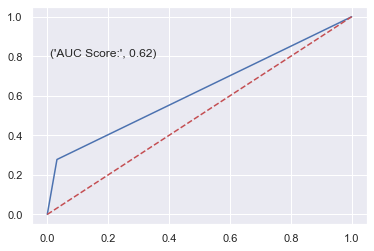

In [444]:
fpr,tpr,th=roc_curve(y_test,ypred_knn);

plt.plot(fpr,tpr);
plt.plot([0,1],[0,1],'r--');
plt.text(x=0.01,y=0.8,s=('AUC Score:',round(roc_auc_score(y_test,ypred_knn),2)));

### Feature Importances - Random Forest

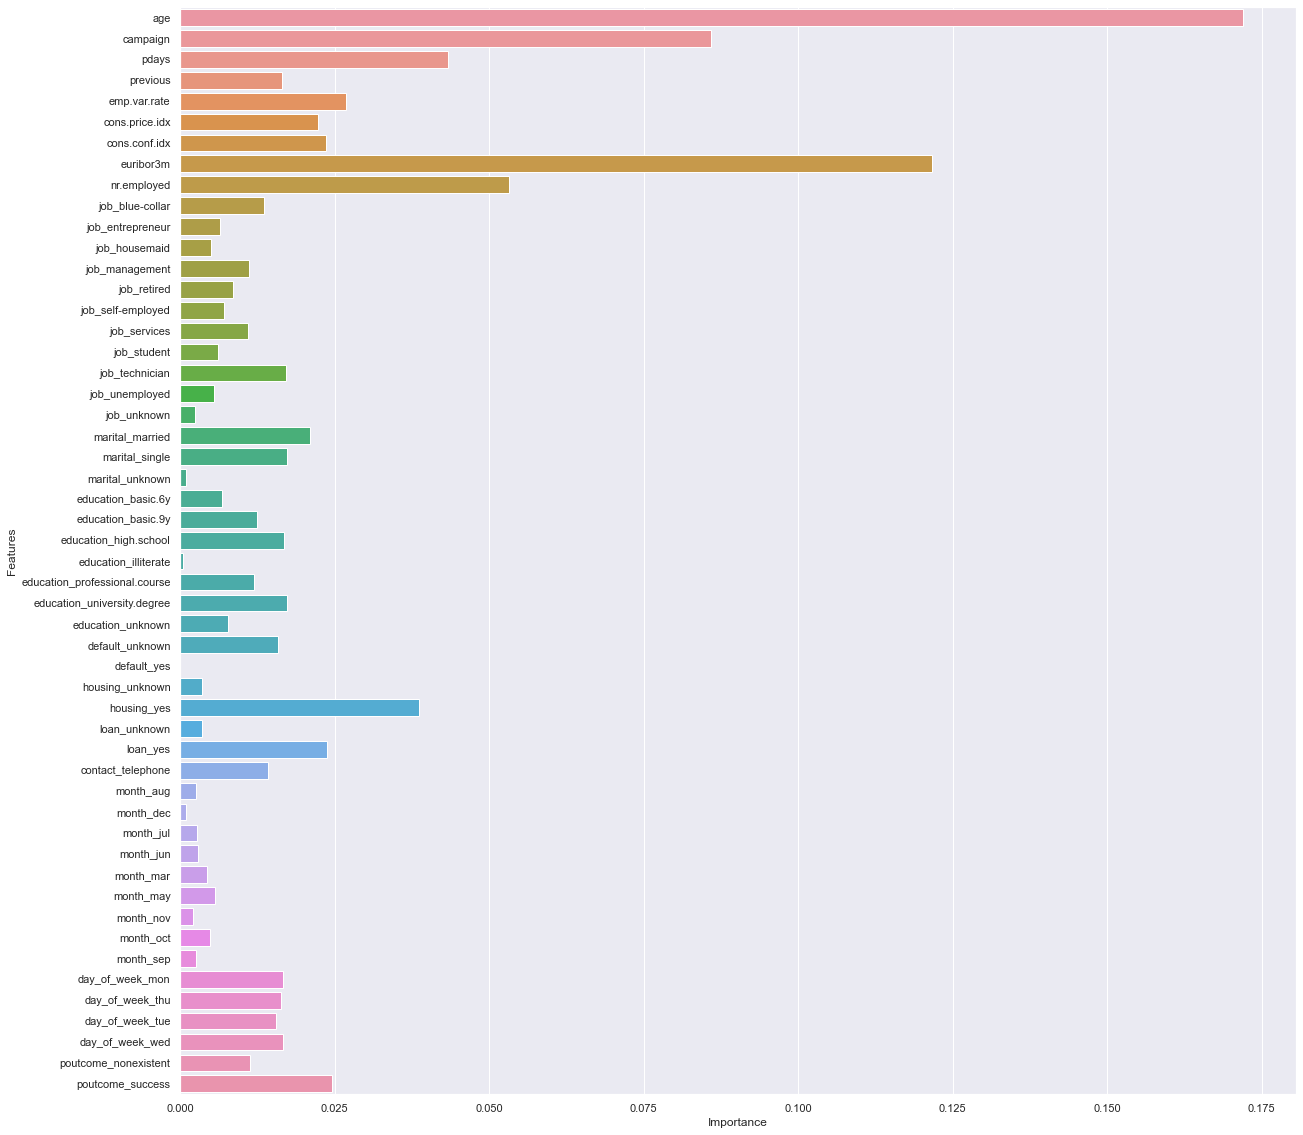

In [445]:
important_features=pd.DataFrame({'Features':X_train.columns,'Importance':rf_model.feature_importances_})
plt.figure(figsize=[20,20]);
sns.barplot(x='Importance',y='Features',data=important_features);

### Feature Importances - GB Classifier

In [ ]:
important_features=pd.DataFrame({'Features':X_train.columns,'Importance':gb_model.feature_importances_})
plt.figure(figsize=[20,20]);
sns.barplot(x='Importance',y='Features',data=important_features);

### Feature Importances - XGB CLassifier

In [ ]:
important_features=pd.DataFrame({'Features':X_train.columns,'Importance':xgb_model.feature_importances_})
plt.figure(figsize=[20,20]);
sns.barplot(x='Importance',y='Features',data=important_features);

The columns euribor3m, cons.conf.idx seem to be the most important features in the dataset .cons.price.idx is the consumer price index which measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households. A lower the price index will encourage clients to subscribe to a term deposit. Similarly, euribor3m is the Euribor (Euro InterBank Offered Rate) which is the average interest rate banks provide on short term loans (3 months). This is a metric that shows clients’ ability to pay off short terms loans.